<h1 style="text-align:center">Deep Learning  Lab Session </h1>
<h1 style="text-align:center">Artificial Neural Networks for Handwritten Digits Recognition</h1>


 
The aim of this session is to practice with Artificial Neural Networks. Answers and experiments should be made by groups of two students. Each group should fill and run appropriate notebook cells. 

To generate your final report and upload it on the submission website http://bigfoot-m1.eurecom.fr/teachingsub/login (using your deeplearnXX/password). Do not forget to run all your cells before generating your final report and do not forget to include the names of all participants in the group. The lab session should be completed ans submitted by April 13th 2018 (23:59:59 CET). 

# Introduction

During this lab session, you will implement, train and test a Neural Network
for the Handwritten Digits Recognition problem <a href="http://yann.lecun.com/exdb/mnist/"> [1] </a> with  different settings of hyperparameters. You will use the MNIST dataset which was constructed from scanned documents available from the National Institute of Standards and Technology (NIST). Images of digits were taken from a variety of scanned documents, normalized in size and centered. 


<img src="images/mnist.png" width="350" height="500" align="center">
<center><span>Figure 1: MNIST digits examples</span></center>


This assignment includes a written part of programms to help you understand how to build and train
your neural net and then to test your code and get results. 

1. <a href="NeuralNetwork.py"> NeuralNetwork.py </a> 
2. <a href="transfer_functions.py"> transfer_functions.py </a> 
3.  <a href="utils.py "> utils.py </a> 


Functions defined inside the python files mentionned above can be imported  using the python command "from filename import function".

You will use the following libraries:

1. <a href="http://cs231n.github.io/python-numpy-tutorial/"> numpy </a>: for creating arrays and using methods to manipulate arrays;

2. <a href="http://matplotlib.org/"> matplotlib  </a>: for making plots.

Before starting the lab, please launch the cell below. After that, you may not need to do any imports during the lab.

In [2]:
# All imports
from NeuralNetwork import NeuralNetwork
from transfer_functions import *
from utils import *
import numpy as np
import matplotlib
import time, random

# Section 1 :  Your First Neural Network

<b>Part 1</b>: Before designing and writing your code, you will first work on a neural network by hand. 
Consider the following neural network with two inputs $x=(x_1,x_2)$, one hidden layer and a single output unit $y$.
The initial weights are set to random values. Neurons 6 and 7 represent biases. Bias values are equal to 1. You will consider a training sample whose feature vector is $x = (0.8, 0.2)$ and whose label is $y = 0.4$.

Assume that neurons have a sigmoid activation function  $f(x)=\frac{1}{(1+e^{-x})}$. The loss function $L$ is a Mean Squared Error (MSE): if $o$ denotes the output of the neural network, then the loss for a given sample $(o, y)$ is $L(o, y) = \left|\left| o - y \right|\right|^2$. In the following, you will assume that if you want to backpropagate the error on a whole batch, you will backpropagate the average error on that batch. More formally, let $((x^{(1)}, y^{(1)}), ..., (x^{(N)}, y^{(N)}))$ be a batch and $o^{(k)}$ the output associated to $x^{(k)}$. Then the total error $\bar{L}$ will be as follows:

<div align="center">$\bar{L} = \frac{1}{N} \sum_{k=1}^{N} L(o^{(k)}, y^{(k)})$.</div>




<img src="images/NN.png" width="700" height="900"> 
<center><span>Figure 2: Neural network </span></center>


<b>Question 1.1.1</b>: Compute the new values of weights $w_{i,j}$ after a forward pass and a backward pass, and the outputs of the neural network before and after the backward path, when the learning rate is $\lambda$=5.
$w_{i,j}$ is the weight of the connexion between neuron $i$ and neuron $j$. Please detail your computations in the cell below and print your answers.

In [2]:
# Initial values

lr = 5.0
# input
x1, x2 = 0.8, 0.2

# initial the parameters
x6, x7 = 1.0, 1.0
w13, w14, w23, w24, w63, w64 = 0.3, -0.5, 0.8, 0.2, 0.2, -0.4
w35, w45, w75 = -0.6, 0.4, 0.5

# ture label
y = 0.4

# forward pass on hidden layer
x3 = sigmoid(x1 * w13 + x2 * w23 + x6 * w63)
x4 = sigmoid(x1 * w14 + x2 * w24 + x6 * w64)
x5 = sigmoid(x3 * w35 + x4 * w45 + x7 * w75)

print("=== FORWARD PASS 1 ===")
print("Output =", x5)

# backpropagate 
d_w35 = 2 * (x5 - y) * x5 * (1 - x5) * x3
d_w45 = 2 * (x5 - y) * x5 * (1 - x5) * x4
d_w75 = 2 * (x5 - y) * x5 * (1 - x5) * x7

d_w13 = d_w35 * w35 * (1 - x3) * x1
d_w14 = d_w45 * w45 * (1 - x4) * x1
d_w23 = d_w35 * w35 * (1 - x3) * x2
d_w24 = d_w45 * w45 * (1 - x4) * x2
d_w63 = d_w35 * w35 * (1 - x3) * x6
d_w64 = d_w45 * w45 * (1 - x4) * x6

# upgrade the weights
w13 -= lr * d_w13
w14 -= lr * d_w14
w23 -= lr * d_w23
w24 -= lr * d_w24
w63 -= lr * d_w63
w64 -= lr * d_w64
w35 -= lr * d_w35
w45 -= lr * d_w45
w75 -= lr * d_w75

print("=== BACKWARD PASS ===")
print("w13 =", w13)
print("w14 =", w14)
print("w23 =", w23)
print("w24 =", w24)
print("w63 =", w63)
print("w64 =", w64)
print("w35 =", w35)
print("w45 =", w45)
print("w75 =", w75)

# forward pass
x3 = sigmoid(x1 * w13 + x2 * w23 + x6 * w63)
x4 = sigmoid(x1 * w14 + x2 * w24 + x6 * w64)
x5 = sigmoid(x3 * w35 + x4 * w45 + x7 * w75)

print("=== FORWARD PASS 2 ===")
print("Output =", x5)

=== FORWARD PASS 1 ===
Output = 0.5597295991095776
=== BACKWARD PASS ===
w13 = 0.3432265432215471
w14 = -0.5273473101875394
w23 = 0.8108066358053868
w24 = 0.19316317245311515
w63 = 0.2540331790269339
w64 = -0.4341841377344243
w35 = -0.8541467506279605
w45 = 0.2745727217772572
w75 = 0.10637455535192797
=== FORWARD PASS 2 ===
Output = 0.40648823589210115


<b>Part 2</b>: Neural Network Implementation

Please read all source files carefully and understand the data structures and all functions.
You are to complete the missing code. 
First you should define the neural network (using the NeuralNetwork class, see in the <a href="NeuralNetwork.py"> NeuralNetwork.py</a> file) and reinitialise weights. 
Then you will need to complete the feedforward() and the backpropagate() functions. 

<b>Question 1.2.1</b>: Implement the feedforward() function.

In [3]:
class NeuralNetwork(NeuralNetwork):
    def feedforward(self, inputs, softmax_output=False):
        # assign the input
        self.o_input = np.array(inputs)
        # add input bias
        self.o_input = np.append(self.o_input, np.ones((len(inputs), 1)), axis=1)
        
        # compute hidden layer activation and output
        self.u_hidden = self.o_input.dot(self.W_input_to_hidden)
        self.o_hidden = self.transfer_f(self.u_hidden)
        self.o_hidden = np.append(self.o_hidden, np.ones((len(inputs), 1)), axis=1)
        
        # compute output layer activation and output
        self.u_output = self.o_hidden.dot(self.W_hidden_to_output)
        
        if softmax_output:
            self.o_output = softmax(self.u_output)
        else:
            self.o_output = self.transfer_f(self.u_output)

<b>Question 1.2.2</b>: Test your implementation: create the Neural Network defined in Part 1 and see if the feedforward() function you implemented gives the same results as the ones you found by hand.

In [4]:
# First define your neural network
model = NeuralNetwork(input_layer_size=2,
                      hidden_layer_size=2,
                      output_layer_size=1,
                      transfer_f=sigmoid, 
                      transfer_df=dsigmoid)

# Then initialize the weights according to Figure 2
W_input_to_hidden = np.array([[.3, -.5],[.8,  .2],[.2, -.4]])
W_hidden_to_output = np.array([-.6, .4, .5]).reshape(3, -1)
model.initialize_weights(W_input_to_hidden, W_hidden_to_output)

# Feed test values
test = np.array([0.8, 0.2]).reshape(1, -1)
model.feedforward(test)

# Print the output
print("Output =", model.o_output[0][0])

Output = 0.5597295991095776


<b>Question 1.2.3</b>: Implement the backpropagate() function.

In [5]:
class NeuralNetwork(NeuralNetwork):   
    def backpropagate(self, targets, learning_rate=5.0, softmax_output=False):
        # backpropagate on output layer
        if softmax_output:
            self.dE_du_output = self.o_output - targets
        else:
            self.dE_du_output = 2 * np.multiply((self.o_output - targets), self.transfer_df(self.u_output))
        dE_dw_output = np.dot(self.dE_du_output.T, self.o_hidden).T / len(targets)
        
        # backpropagate on hidden layer
        self.dE_du_hidden = np.dot(self.dE_du_output, self.W_hidden_to_output.T[:,:-1])
        self.dE_du_hidden = np.multiply(self.dE_du_hidden, self.transfer_df(self.u_hidden))        
        dE_dw_hidden = np.dot(self.dE_du_hidden.T, self.o_input).T / len(targets)
        
        #update the weights
        self.W_input_to_hidden -= learning_rate * dE_dw_hidden
        self.W_hidden_to_output -= learning_rate * dE_dw_output


<b>Question 1.2.4</b>: Test your implementation: create the Neural Network defined in Part 1 and see if the backpropagate() function you implemented gives the same weight updates as the ones you found by hand. Do another forward pass and see if the new output is the same as the one you obtained in Question 1.1.1.

In [6]:
def printWeights(weightsMatrix):
    for i in range(weightsMatrix.shape[0]):
        for j in range(weightsMatrix.shape[1]):
            print("w_" + str(i+1) + str(j+1) + ": " + str(weightsMatrix[i][j]))

In [7]:
# First define your neural network
model = NeuralNetwork(input_layer_size=2,
                      hidden_layer_size=2,
                      output_layer_size=1,
                      transfer_f=sigmoid, 
                      transfer_df=dsigmoid)

# Then initialize the weights according to Figure 2
W_input_to_hidden = np.array([[.3, -.5],
                              [.8,  .2],
                              [.2, -.4]])

W_hidden_to_output = np.array([-.6, .4, .5]).reshape(3, -1)

model.initialize_weights(W_input_to_hidden, W_hidden_to_output)

print("=== FORWARD PASS 1 ===")

# Feed test values
test = np.array([0.8, 0.2]).reshape(1, -1)
model.feedforward(test)

# Print the output
print("Output =", model.o_output)

print("=== BACKWARD PASS ===")

# Backpropagate
targets = [0.4]
model.backpropagate(targets)

# Print weights
print("W_input_to_hidden:")
printWeights(model.W_input_to_hidden)
print("W_hidden_to_output:")
printWeights(model.W_hidden_to_output)

print("=== FORWARD PASS 2 ===")
# Feed test values again
model.feedforward(test)

# Print the output
print("Output =", model.o_output)

=== FORWARD PASS 1 ===
Output = [[0.5597296]]
=== BACKWARD PASS ===
W_input_to_hidden:
w_11: 0.3432265432215471
w_12: -0.5273473101875394
w_21: 0.8108066358053868
w_22: 0.19316317245311515
w_31: 0.2540331790269339
w_32: -0.4341841377344243
W_hidden_to_output:
w_11: -0.8541467506279605
w_21: 0.2745727217772572
w_31: 0.10637455535192786
=== FORWARD PASS 2 ===
Output = [[0.40648824]]


Checked your implementations and found that everything was fine? Congratulations! You can move to the next section.

# Section 2: Handwritten Digits Recognition

The MNIST dataset consists of handwritten digit images. It is split into a training set containing 60,000 samples and a test set containing 10,000 samples. In this Lab Session, the official training set of 60,000 images is divided into an actual training set of 50,000 samples a validation set of 10,000 samples. All digit images have been size-normalized and centered in a fixed size image of 28 x 28 pixels. Images are stored in byte form: you will use the NumPy python library to convert data files into NumPy arrays that you will use to train your Neural Networks.

You will first work with a small subset of MNIST (1000 samples), then on a very small subset of MNIST (10 samples), and eventually run a model on the whole one.

The MNIST dataset is available in the Data folder.
To get the training, testing and validation data, run the load_data() function.


In [8]:
# load data into numpy array
training_data, validation_data, test_data = load_data()
small_training_data = (training_data[0][:1000], training_data[1][:1000])
small_validation_data = (validation_data[0][:200], validation_data[1][:200])
indices = [1, 3, 5, 7, 2, 0, 13, 15, 17, 4]
vsmall_training_data = ([training_data[0][i] for i in indices], [training_data[1][i] for i in indices])

Loading MNIST data .....
Done.


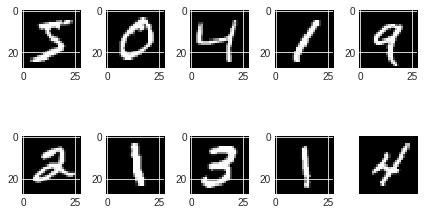

In [9]:
# And you can run that cell if you want to see what the MNIST dataset looks like
ROW = 2
COLUMN = 5
for i in range(ROW * COLUMN):
    # train[i][0] is i-th image data with size 28x28
    image = np.array(training_data[0][i]).reshape(28, 28)   
    plt.subplot(ROW, COLUMN, i+1)          
    plt.imshow(image, cmap='gray')  # cmap='gray' is for black and white picture.
plt.axis('off')  # do not show axis value
plt.tight_layout()   # automatic padding between subplots
plt.show()

<b>Part 1</b>: Build a bigger Neural Network

The input layer of the neural network that you will build contains neurons encoding the values of the input pixels. The training data for the network will consist of many 28 by 28 pixel images of scanned handwritten digits. Thus, the input layer contains 784=28×28 units. The second layer of the network is a hidden layer. We set the number of neurons in the hidden layer to 30. The output layer contains 10 neurons.

<b>Question 2.1.1</b>: Create the network described above using the NeuralNetwork class.


In [10]:
class NeuralNetwork(NeuralNetwork):
    def train(self, 
              train_data, 
              validation_data, 
              epochs=50, 
              learning_rate=5.0, 
              plot=True, 
              init=True,
              batch_size=1,
              softmax_output=False):
        
        def next_batch(data):
            # shuffle the data at the beginning of each epoch
            data = np.array(list(zip(*data)))
            np.random.shuffle(data)
            data = list(zip(*data))
            
            # generate mini batches
            for i in np.arange(0, len(data[0]), batch_size):
                offset = min(i+batch_size, len(data[0]))
                yield (data[0][i:offset], data[1][i:offset])
        
        # initialize weights
        if init:
            self.initialize_weights()
        best_W_hidden_to_output = None
        best_W_input_to_hidden = None
                                                    
        # get starting time to return execution time
        start_time = time.time()
        
        best_acc_it = 0
        train_accuracies = []
        val_accuracies = []
        errors = []
        
        for it in range(epochs):
            errorsi = 0
            count = 0
            
            for (inputs_batch, targets_batch) in next_batch(train_data):

                # compute the outputs
                self.feedforward(inputs_batch, softmax_output)
                
                # compute the derivatives
                self.backpropagate(targets_batch, learning_rate, softmax_output)
                
                # compute the squared error
                error = targets_batch - self.o_output
                error *= error
                errorsi += np.sum(error) * len(targets_batch)
                
                # compute training data accuracy
                target = np.argmax(targets_batch, axis=1)
                prediction = np.argmax(self.o_output, axis=1)
                count += np.sum(target == prediction)
               
            # keep track of learning values
            errors.append(errorsi/len(train_data[0]))       
            train_accuracies.append(count * 100 / len(train_data[0]))
            new_accuracy = self.accuracy(validation_data,softmax_output)
            val_accuracies.append(new_accuracy)
            
            # update best accuracy
            if new_accuracy > val_accuracies[best_acc_it]:
                best_acc_it = it
                best_W_hidden_to_output = self.W_hidden_to_output
                best_W_input_to_hidden = self.W_input_to_hidden
        
        # set the best weights as current weights
        self.initialize_weights(best_W_input_to_hidden, best_W_hidden_to_output)
        
        # plot learning curves and best accuracy
        if plot:
            self.plot_curves(train_accuracies, 
                             val_accuracies, 
                             errors, 
                             learning_rate, 
                             best_acc_it)
        
        return val_accuracies[best_acc_it], time.time() - start_time

In [11]:
# Define your neural network
mnist_model = NeuralNetwork(input_layer_size = 784, 
                            hidden_layer_size = 30,
                            output_layer_size = 10,
                            transfer_f = sigmoid, 
                            transfer_df = dsigmoid)

<b>Question 2.1.2</b>: Train your Neural Network on the small subset of MNIST (300 iterations) and print the new accuracy on test data. You will use small_validation_data for validation. Try different learning rates (0.1, 1.0, 10.0). You should use the train() function of the NeuralNetwork class to train your network, and the weights_init() function to reinitialize weights between tests. Print the accuracy of each model on test data using the predict() function.

### Stochastic Gradient Descent

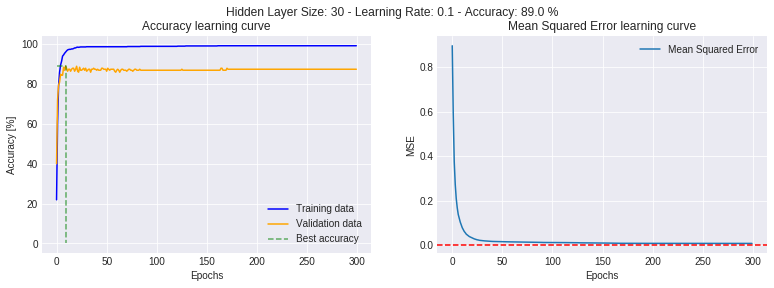

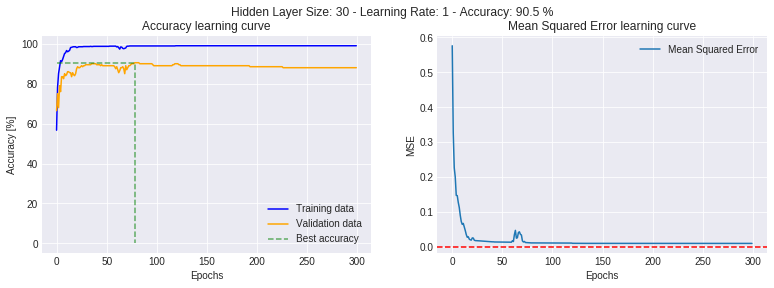

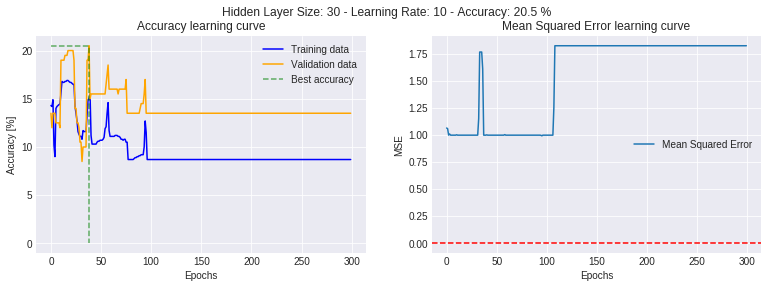

In [12]:
# train the neural network with different learning rates and show accuracy on test data
learning_rates = [0.1, 1, 10]
for lr in learning_rates:
    mnist_model.train(small_training_data, 
                      small_validation_data, 
                      epochs=300, 
                      learning_rate=lr,
                      batch_size = 1)

### Batch Gradient Descent

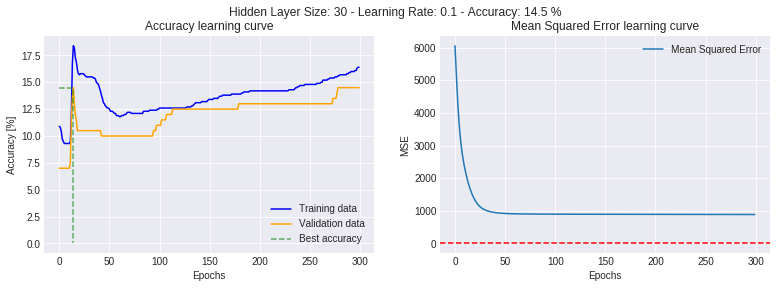

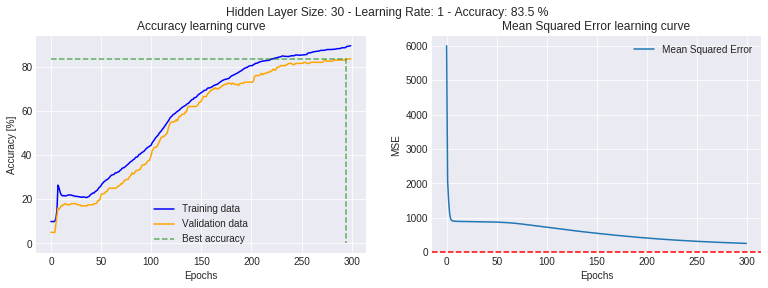

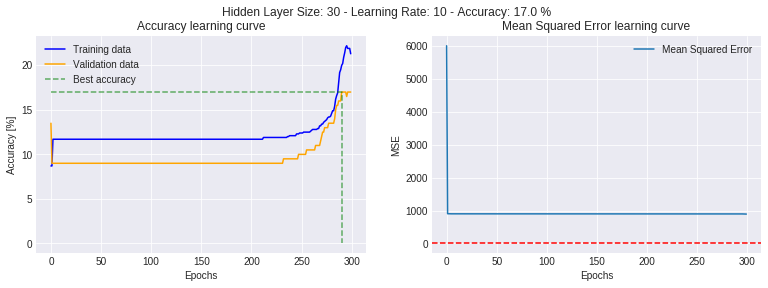

In [13]:
learning_rates = [0.1, 1, 10]
for lr in learning_rates:
    mnist_model.train(small_training_data, 
                      small_validation_data, 
                      epochs=300, 
                      learning_rate=lr,
                      batch_size=len(small_training_data[0]))

### Mini-Batch Gradient Descent

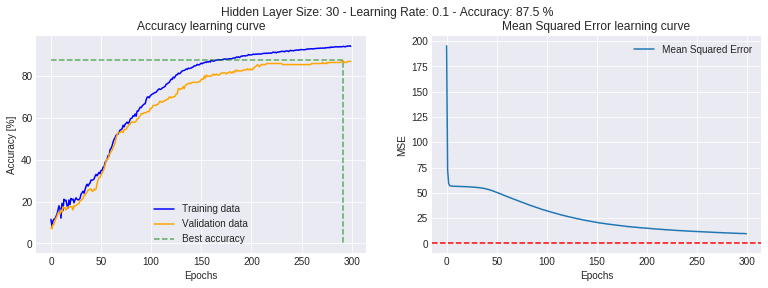

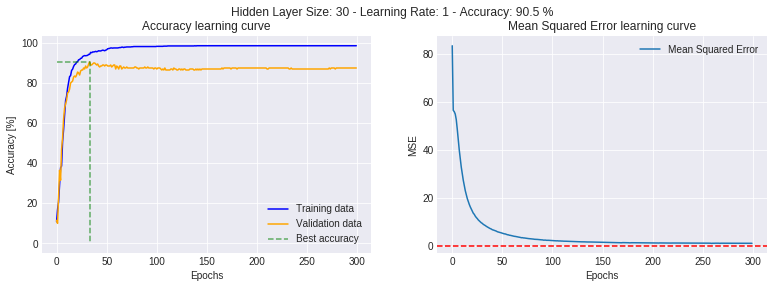

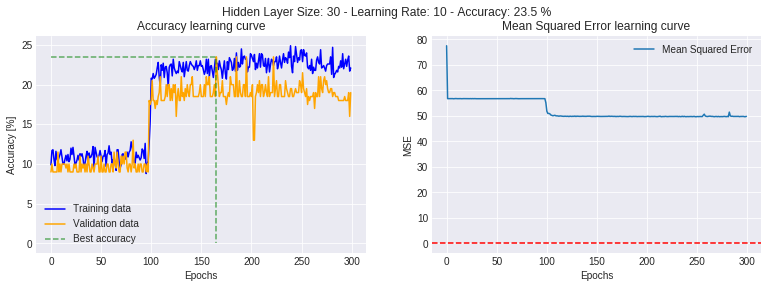

In [14]:
learning_rates = [0.1, 1, 10]
for lr in learning_rates:
    mnist_model.train(small_training_data, 
                      small_validation_data, 
                      epochs=300, 
                      learning_rate=lr,
                      batch_size=64)

<div class="alert alert-success" align="justify">

From the above table and plots, we can see the differences between the implementations of the gradient descent algorithm. The reasons for our choice to implement the mini-batch gradient descent are clear from the results: the general batch gradient descent is too slow in converging compared to the others and it does not tolerate great learning rates, the stochastic gradient descent is very fast but the mini batch is more stable: it oscillates less around the optimal solution.
</div>

<b>Question 2.1.3</b>: Do the same with 15 and 75 hidden neurons.

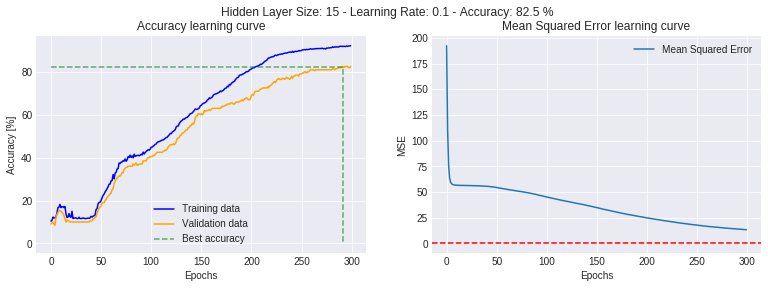

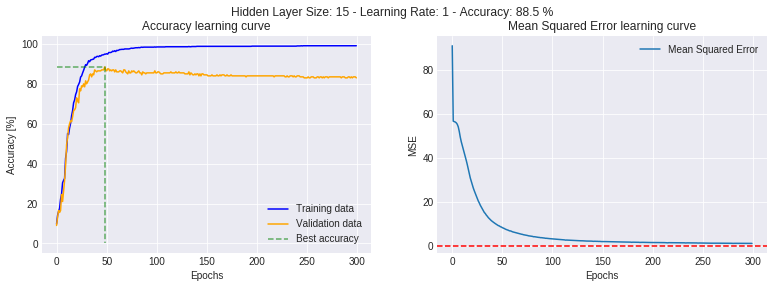

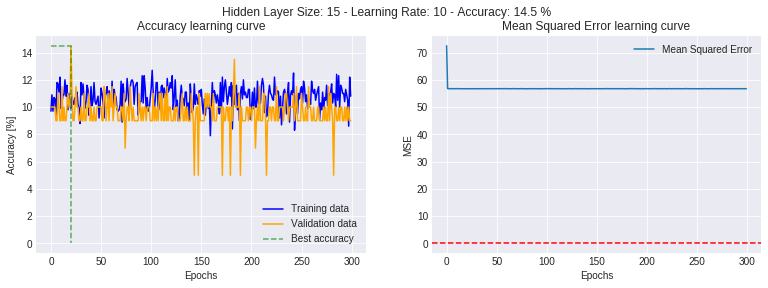

In [15]:
# define a neural network with 15 hidden neurons
mnist_model = NeuralNetwork(input_layer_size = 784, 
                            hidden_layer_size = 15,
                            output_layer_size = 10, 
                            transfer_f = sigmoid, 
                            transfer_df = dsigmoid)

# train the neural network with different learning rates and show accuracy on test data
for lr in learning_rates:
    mnist_model.train(small_training_data, 
                      small_validation_data, 
                      epochs=300, 
                      learning_rate=lr, 
                      batch_size=64)

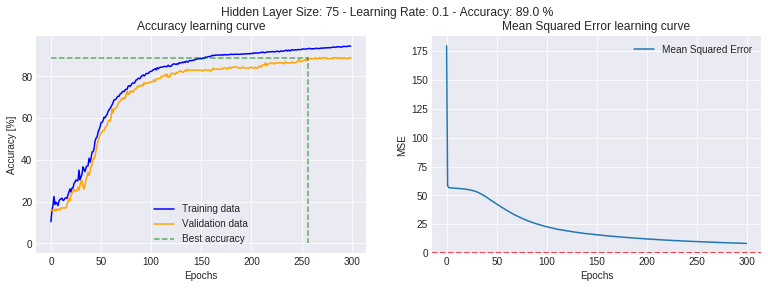

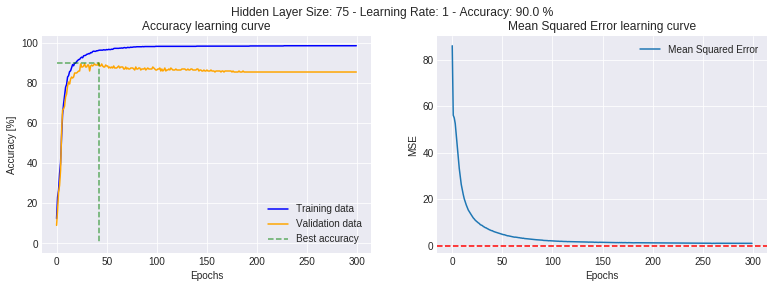

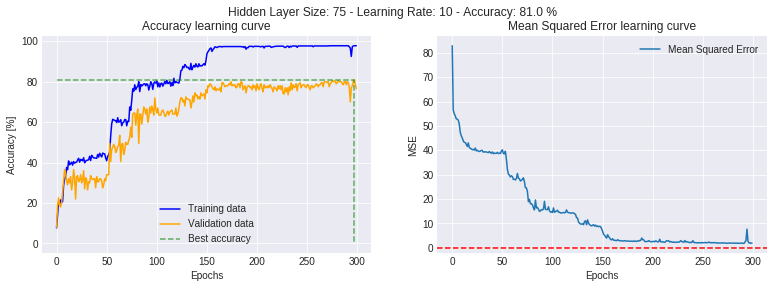

In [16]:
# define a neural network with 75 hidden neurons
mnist_model = NeuralNetwork(input_layer_size = 784, 
                            hidden_layer_size = 75,
                            output_layer_size = 10, 
                            transfer_f = sigmoid, 
                            transfer_df = dsigmoid)

# train the neural network with different learning rates and show accuracy on test data
for lr in learning_rates:
    mnist_model.train(small_training_data, 
                      small_validation_data, 
                      epochs=300, 
                      learning_rate=lr, 
                      batch_size=64)

<b>Question 2.1.5</b>: Explain the results you obtained at Questions 2.1.2, 2.1.3 and 2.1.4.

<div class="alert alert-success" align="justify">
The table above shows the different performances in terms of accuracy of the implemented neural networks. It is clear that the network with 75 hidden neurons performs better than the others because a larger number of hidden neurons makes the model more elastic, therefore it can adapt better to the problem (even if we could risk some overfitting).<br> <br>

The plots give us more insights about the situation: the 75-hidden-neurons neural network converges faster to a low error and high accuracy. Moreover, the other models generally oscillate in a pretty wide neighbourhood of the optimum when using a too high learning rate (10) while it is able to handle it and get a good accuracy anyway.<br><br>

In the last plots, regarding the very small dataset, we can see how the learning rate plays a key role in the training of the model: the accuracy on validation data is generally small because of the size of the training set, but the accuracy on the training data is able to reach the top percentages only when the learning rate is sufficently high. An analogous comment can be made regarding the loss of the model.<br>
Finally, this last plots, prove again that an higher number of hidden neurons is able to converge with higher learning rates.
</div>

<b>Question 2.1.6</b>: Among all the numbers of hidden neurons and learning rates you tried in previous questions, which ones would you expect to achieve best performances on the whole dataset? Justify your answer.

<div class="alert alert-success" align="justify">
According to the previous results and comments we decided to take 75 hidden neurons to have higher accuracy and robustness, and (after some testing) a learning rate of 1.2, that is neither too low, risking not to converge, nor too high, risking to diverge.
</div>

<b>Part 2 (optional)</b>: Another loss function

In classification problems, we usually replace the sigmoids in the output layer by a "softmax" function and the MSE loss by a "cross-entropy" loss. More formally, let $u = (u_1, ..., u_n)$ be the vector representing the activation of the output layer of a Neural Network. The output of that neural network is $o = (o_1, ..., o_n) = \textrm{softmax}(u)$, and

<div align="center">$\textrm{softmax}(u) = (\frac{e^{u_1}}{\sum_{k=1}^n e^{u_k}}, ..., \frac{e^{u_n}}{\sum_{k=1}^n e^{u_k}})$.</div>

If $t = (t_1, ..., t_n)$ is a vector of non-negative targets such that $\sum_{k=1}^n t_k = 1$ (which is the case in classification problems, where one target is equal to 1 and all others are equal to 0), then the cross-entropy loss is defined as follows:

<div align="center">$L_{xe}(o, t) = - \sum_{k=1}^n t_k\log(o_k)$.</div>

<b>Question 2.2.1</b>: Let $L_{xe}$ be the cross-entropy loss function and $u_i$, $i \in \lbrace 1, ..., n \rbrace$, be the activations of the output neurons. Let us assume that the transfer function of the output neurons is the softmax function. Targets are $t_1, ..., t_n$. Derive a formula for $\frac{\partial L_{xe}}{\partial u_i}$ (details of your calculations are not required).

Answer: <br>
The derivative of the softmax function is:<br><br>
$$ \dfrac{\partial{f(u_i)}}{\partial{u_i}} = f(u_i) (\delta_{ij} - f(u_i)),\qquad where\ Kronecker\ delta\ 
\delta_{ij} = \begin{cases}
    1,\quad i = j\\
    0,\quad i \ne j
\end{cases}$$<br>
Therefore, the derivative of the cross-entropy loss function can be computed as follows:<br><br>
$$\frac{\partial L_{xe}}{\partial u_i} = -\underset{k}{\sum}t_k\dfrac{\partial log(f(u_k))}{\partial u_i} =$$
$$ = -\underset{k}{\sum}t_k\dfrac{\partial log(f(u_k))}{\partial f(u_k)}\times\dfrac{\partial f(u_k)}{\partial u_i} =$$
$$ = -\underset{k}{\sum}t_k\dfrac{1}{f(u_k)}\times\dfrac{\partial f(u_k)}{\partial u_i} $$<br>
The result above can be splitted knowing the derivative of the softmax function:<br><br>
$$ \frac{\partial L_{xe}}{\partial u_i} = -t_i(1 - f(u_i)) - \underset{k\ne i}{\sum}t_k\dfrac{1}{f(u_k)}(-f(u_k)\cdot f(u_i)) =$$
$$ =-t_i + t_i\cdot f(u_i)) + \underset{k\ne i}{\sum}t_k\cdot f(u_i)) =$$
$$ = f(u_i)\left( t_i + \underset{k\ne i}{\sum}t_k\right) - t_i $$<br>
Since $\sum_k t_k = 1$, we can finally write:<br><br>
$$\frac{\partial L_{xe}}{\partial u_i} = f(u_i) -t_i $$

<b>Question 2.2.2</b>: Implement a new feedforward() function and a new backpropagate() function adapted to the cross-entropy loss instead of the MSE loss.

<b>Question 2.2.3</b>: Create a new Neural Network with the same architecture as in Question 2.1.1 and train it using the softmax cross-entropy loss.

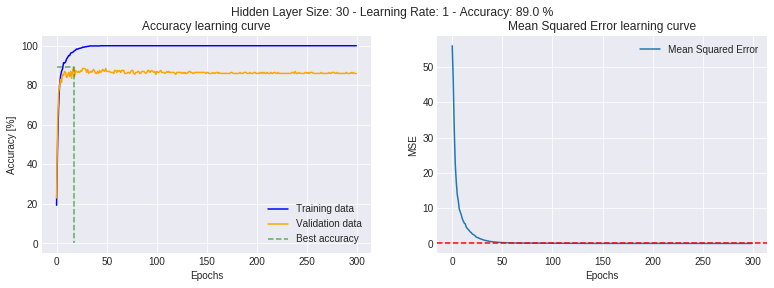

(89.0, 14.52992844581604)

In [17]:
# define a neural network with 30 hidden neurons
mnist_model_xe = NeuralNetwork(input_layer_size = 784, 
                            hidden_layer_size = 30,
                            output_layer_size = 10, 
                            transfer_f = sigmoid, 
                            transfer_df = dsigmoid)

# train the neural network with different learning rates and show accuracy on validation data
mnist_model_xe.train(small_training_data, 
                  small_validation_data, 
                  epochs=300, 
                  learning_rate=1, 
                  batch_size=64,
                  softmax_output=True)


In [18]:
print(mnist_model_xe.accuracy(test_data, True))

87.63


<b>Question 2.2.4</b>: Compare your results with the MSE loss and with the cross-entropy loss.

<div class="alert alert-success" align="justify">
<b> Answer</b>: It's possible to notice how the last implementation, the one using the cross entropy and soft-max is faster in reaching a neighbourhood of the optimum. But it looses a couple of percentage point on the validation data accuracy. This maybe due to the fact that this new model may need different parameters settings to work at this best. Furthermore also the error goes down faster and more smoothly with respect to the previous implementation.<br> <br>

A final remark has to be made regarding the accuracy of our model which is confirmed on the test data, in fact the difference in accuracy between test data and validation data is just 0.08.

</div>
 

<div align="center"><b>THE END!</b>